In [356]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [357]:
iris = load_iris()

In [358]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [359]:
# загружаем данные в датафрейм
# оставляем два признака - sepal_length и sepal_width
data = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]

In [360]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [361]:
# Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica.
data_class = iris.target
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [362]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25, random_state=4)

In [363]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [364]:
lda = LinearDiscriminantAnalysis()

In [365]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [366]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 2,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1])

In [367]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,2
1,0,0
2,2,2
3,2,2
4,2,2
5,1,1
6,1,1
7,0,0
8,0,0
9,2,1


In [368]:
from sklearn.metrics import accuracy_score

In [369]:
# расчет точности модели LDA
accuracy_score(y_test, lda.predict(X_test))

0.868421052631579

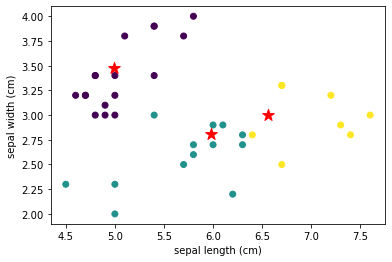

In [370]:
# Визуализация предсказаний для тестовой выборки и центроиды (центры класссов)
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [371]:
# центроиды
lda.means_

array([[4.99375   , 3.475     ],
       [5.98333333, 2.80714286],
       [6.56052632, 3.00526316]])

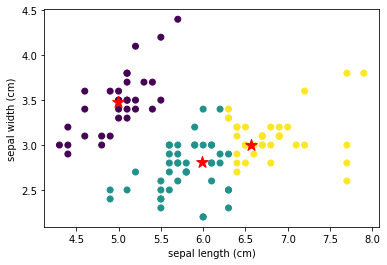

In [372]:
# Визуализация предсказаний для тренировочной выборки и центроиды (центры классов)
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=lda.predict(X_train))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

In [373]:
from sklearn.cluster import KMeans

Нормализация данных не требуется, тк все признаки в датафрейме уже приведены к одному масштабу (см.)

In [374]:
# строим график локтя для определения оптимального кол-ва кластеров

k_inertia = []
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(np.array(data))
    k_inertia.append(clf_kmeans.inertia_)

Text(0, 0.5, 'Инерция')

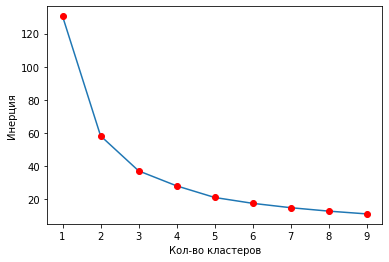

In [375]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Инерция') # (внутриклассовое среднее расстояние каждой точки от центра кластера)

Оптимальное количество кластеров = 2 (на графике явно видна точка перегиба).

In [376]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(np.array(data))
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

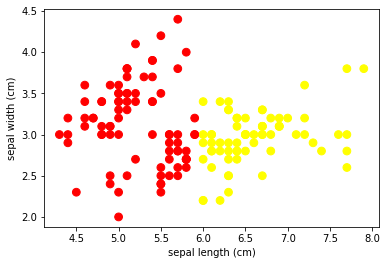

In [377]:
# Визуализация полученной кластеризации 
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], cmap='autumn', c=clusters, s=60)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()